![honey_bee](./honey_bee.webp)
## This notebooks aims to explore honey bee population data provided by [United States Department of Agriculture National Agricultural Statistics Service Quick Stats Dataset](https://quickstats.nass.usda.gov). The data collected was from the United States between the year 1987 and 2017. We will be looking at how the honey bee population has changed in the United States over the years and try to find some insights in the data.
### To find out more about the data please visit [data.world](https://data.world/finley/bee-colony-statistical-data-from-1987-2017).

##### Author: Connor Secen

In [1]:
# required imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Collection:
#### We will being by collecting the data from data.world and storing the various csv files into pandas dataframes.

In [2]:
bee_census = pd.read_csv('https://query.data.world/s/2chgtukrqasmdaks5mzg45pz2w6zw2')
bee_loss = pd.read_excel('https://query.data.world/s/vpgvkfztct3takfsfqagorg7z3luay')
bees_by_state = pd.read_csv('https://query.data.world/s/22grwmbvkk2vbad3wu5ggs4ibkt7mn')

display(bee_census.head())
display(bee_loss.head())
display(bees_by_state.head())

,Year,Period,State,State ANSI,Ag District,Ag District Code,County,County ANSI,Value,CV (%)
0,2012,END OF DEC,ALABAMA,1,BLACK BELT,40,AUTAUGA,1.0,119,27.7
1,2012,END OF DEC,ALABAMA,1,BLACK BELT,40,DALLAS,47.0,65,27.7
2,2012,END OF DEC,ALABAMA,1,BLACK BELT,40,ELMORE,51.0,190,27.7
3,2012,END OF DEC,ALABAMA,1,BLACK BELT,40,GREENE,63.0,14,27.7
4,2012,END OF DEC,ALABAMA,1,BLACK BELT,40,HALE,65.0,10,27.7


,Year,Season,State,Total Annual Loss,Beekeepers,Beekeepers Exclusive to State,Colonies,Colonies Exclusive to State
0,2016/17,Annual,Massachusetts,0.159,87,0.943,27186,0.023
1,2016/17,Annual,Montana,0.171,21,0.524,35905,0.003
2,2016/17,Annual,Nevada,0.230,13,0.923,2512,0.052
3,2016/17,Annual,Maine,0.233,65,0.938,41102,0.014
4,2016/17,Annual,Wyoming,0.234,18,0.778,6521,0.014


,Year,Period,Week Ending,State,State ANSI,Watershed,Data Item,Value,CV (%)
0,2017,JAN THRU MAR,NaN,ALABAMA,1,NaN,ADDED & REPLACED,570,NaN
1,2017,JAN THRU MAR,NaN,ARIZONA,4,NaN,ADDED & REPLACED,"2,900",NaN
2,2017,JAN THRU MAR,NaN,ARKANSAS,5,NaN,ADDED & REPLACED,430,NaN
3,2017,JAN THRU MAR,NaN,CALIFORNIA,6,NaN,ADDED & REPLACED,"215,000",NaN
4,2017,JAN THRU MAR,NaN,COLORADO,8,NaN,ADDED & REPLACED,100,NaN


## Data Exploration:
#### Now that we have the data we want, we can being to learn more about what has been collected. We will look into various statistics on the dataframes and visualize the data using various techniques.

In [3]:
display(bee_census.describe())

,Year,State ANSI,Ag District Code,County ANSI
count,7830.000000,7830.000000,7830.000000,7821.000000
mean,2007.212005,30.292976,48.379949,92.702084
std,4.065470,15.004933,25.675393,84.042373
min,2002.000000,1.000000,10.000000,1.000000
25%,2002.000000,19.000000,30.000000,33.000000
50%,2007.000000,29.000000,50.000000,75.000000
75%,2012.000000,45.000000,70.000000,127.000000
max,2012.000000,56.000000,97.000000,810.000000


In [4]:
print(bee_census.Year.unique().tolist())
print(bees_by_state.Year.unique().tolist())

[2012, 2007, 2002]
[2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987]


#### Here we see that the data available in the census dataframe, has been collected in 5 year increments starting from 2002 till 2012, something important to note. Howeever we do have data from the year 1987 to 2017 in the states dataframe.

In [5]:
bee_census.head(10)
bee_census.replace({' (D)':0}, inplace=True)
bee_census['Value'] = bee_census['Value'].str.replace(',', '')

In [6]:
print(bee_census.dtypes)
bee_census['Value'] = pd.to_numeric(bee_census['Value'])

Year                  int64
Period               object
State                object
State ANSI            int64
Ag District          object
Ag District Code      int64
County               object
County ANSI         float64
Value                object
CV (%)               object
dtype: object


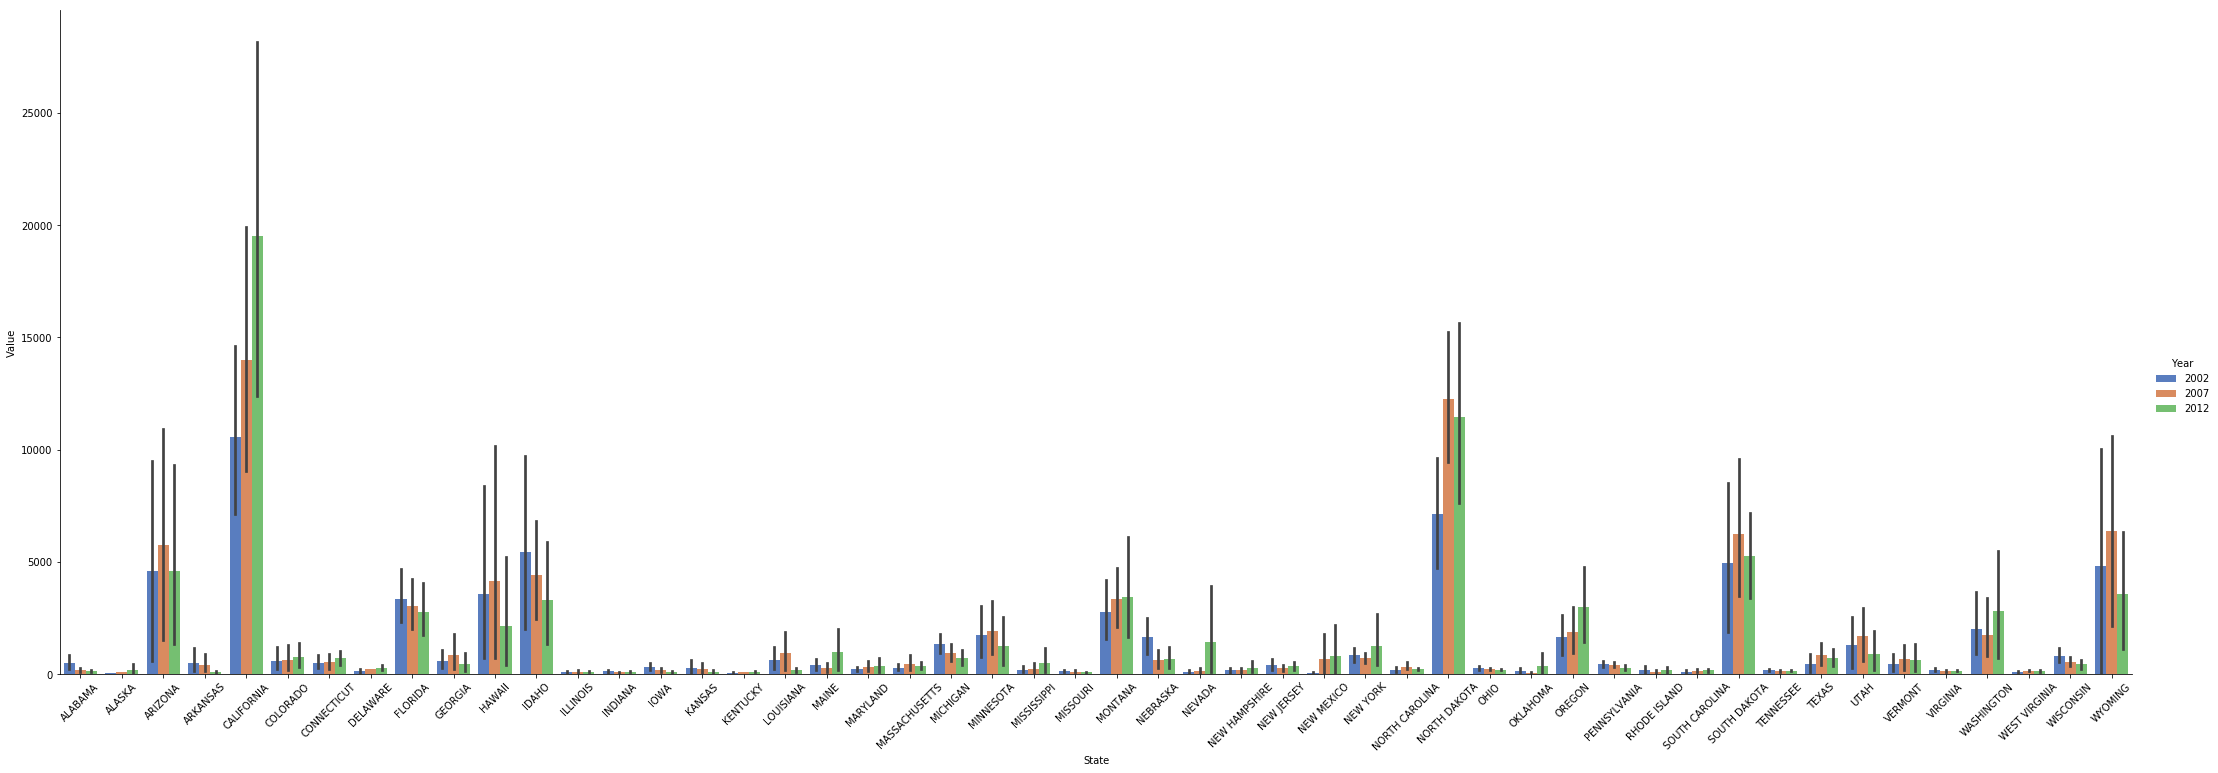

In [7]:
count_by_state_year = sns.catplot(x="State", y="Value", hue="Year", data=bee_census,
                height=10, aspect=3, kind="bar", palette="muted").set_xticklabels(rotation=45)

#### The plot above gives an overview of the number of bee coloneies in each state for the years 2002, 2007, and 2012. Multiple things can be seen from this graph, one there have only been six states that have had over 5000 colonies in the last 20 years. There are also many states that have so few colonies that they hardly show up on the graph. One interesting thing to me, is that the number of colonies in California has actually grow each time the census was run.

#### Lets now look at the total number of colonies for the given years

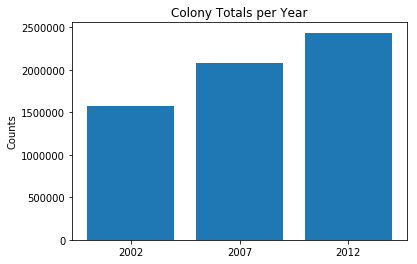

In [9]:
temp = bee_census.groupby(by=['Year']).sum()

labels = [str(x) for x in temp.index.tolist()]
counts = temp['Value'].tolist()

fig, ax = plt.subplots()

ax.bar(labels, counts)

ax.set_ylabel('Counts')
ax.set_title('Colony Totals per Year')

plt.show()

#### The above plot is surprising to me as it shows that the total number of colonies across the United states does actaully incresase between the years 2002 and 2012.
#### Lets compare this to the survery dataframe and see if they show similar trends.

In [10]:
bees_by_state.Value.replace({' (D)':0}, inplace=True)
bees_by_state['Value'] = bees_by_state['Value'].str.replace(',', '')
bees_by_state['Value'] = pd.to_numeric(bees_by_state['Value'])

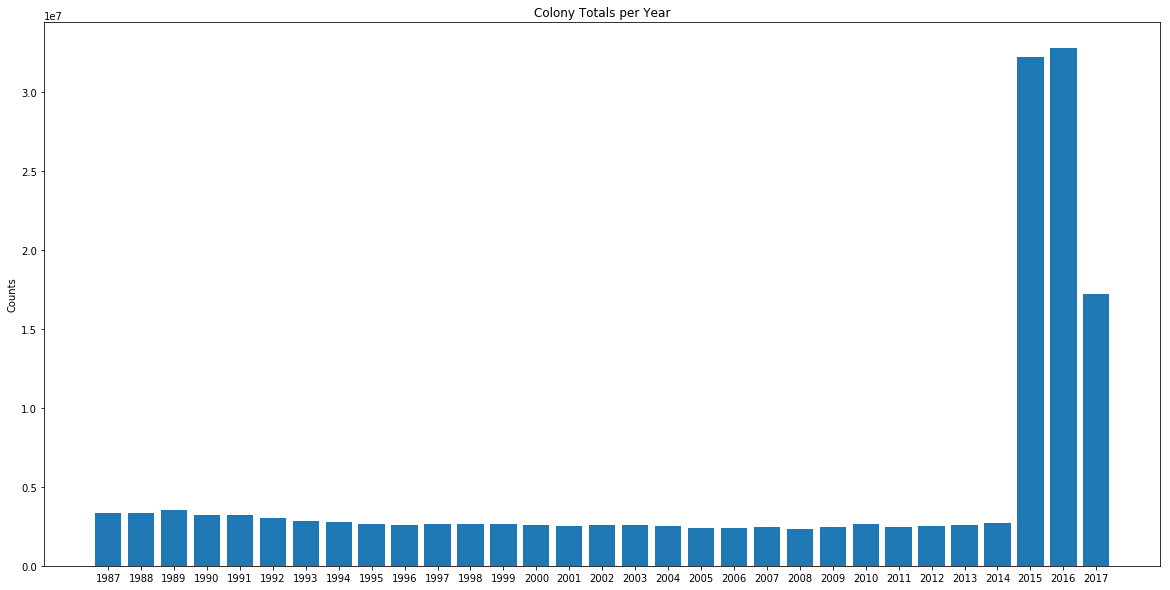

In [11]:
temp = bees_by_state.groupby(by=['Year']).sum()

labels = [str(x) for x in temp.index.tolist()]
counts = temp['Value'].tolist()

fig, ax = plt.subplots(figsize=(20,10))

ax.bar(labels, counts)

ax.set_ylabel('Counts')
ax.set_title('Colony Totals per Year')

plt.show()

#### Given the graph above it is hard to tell what happened in the year 2015. From the news about the declining bee populations, it is hard to believe that an increase like this in the colony count is accurate. Let see if we can see and discrepincies with the data, though we may just not use this dataset, as it validity is questionable.

In [14]:
bees_by_state.Year.value_counts()

2016    940
2015    760
2017    488
1989     49
1990     49
1987     49
1988     49
2001     44
1995     44
1993     44
1991     44
1992     44
1994     44
1996     44
2003     44
2002     44
1999     43
1997     43
1998     43
2000     43
2004     41
2005     41
2006     41
2008     41
2007     41
2010     40
2014     40
2011     40
2009     40
2012     40
2013     39
Name: Year, dtype: int64

#### Right away we see that there are far move observations in the year 2015-2017 than any other year. Lets see why. My first thought is that the may be more observations in certain periods, so I'll start there

In [23]:
bees_by_state.groupby(by=['Year', 'Period']).count()

,,Week Ending,State,State ANSI,Watershed,Data Item,Value,CV (%)
Year,Period,,,,,,,
1987,MARKETING YEAR,0,49,49,0,49,49,0
1988,MARKETING YEAR,0,49,49,0,49,49,0
1989,MARKETING YEAR,0,49,49,0,49,49,0
1990,MARKETING YEAR,0,49,49,0,49,49,0
1991,MARKETING YEAR,0,44,44,0,44,44,0
1992,MARKETING YEAR,0,44,44,0,44,44,0
1993,MARKETING YEAR,0,44,44,0,44,44,0
1994,MARKETING YEAR,0,44,44,0,44,44,0
1995,MARKETING YEAR,0,44,44,0,44,44,0


#### This is a very revealing groupby, which confirms my intuition. From 1987-2014 observations were only made in the period 'Marketing Year' and from 2015-2017 many more observations were made. By filter out the other periods, we can get a better understanding of what is happening state to state.

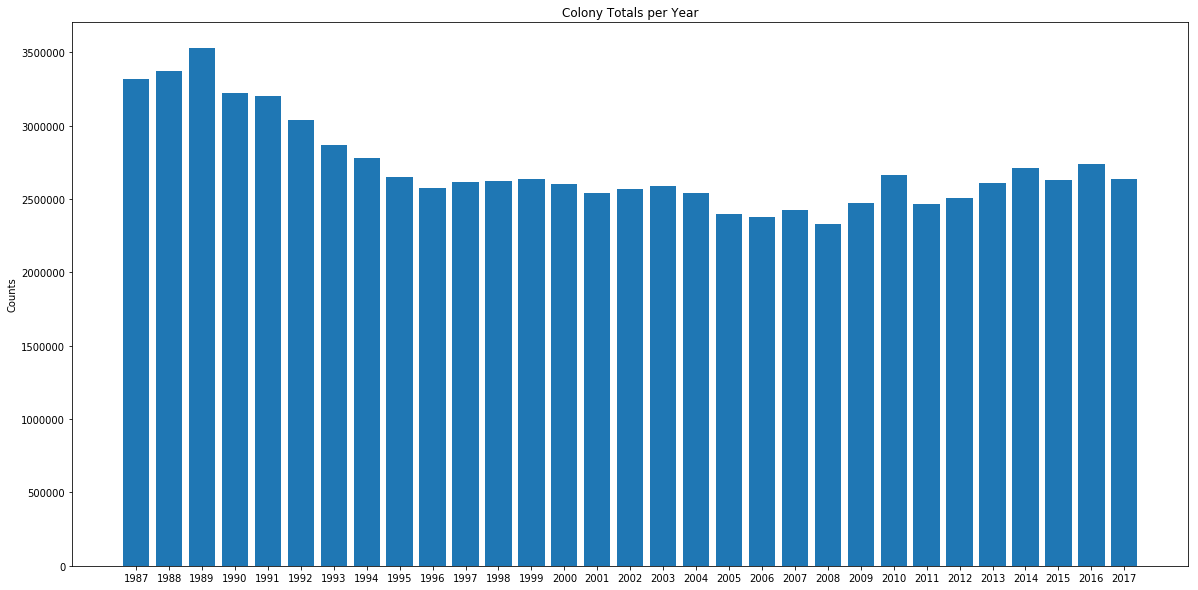

In [25]:
bees_by_state_one_period = bees_by_state[bees_by_state['Period'] == 'MARKETING YEAR']
temp = bees_by_state_one_period.groupby(by=['Year']).sum()

labels = [str(x) for x in temp.index.tolist()]
counts = temp['Value'].tolist()

fig, ax = plt.subplots(figsize=(20,10))

ax.bar(labels, counts)

ax.set_ylabel('Counts')
ax.set_title('Colony Totals per Year')

plt.show()